In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

# Loading data from csv file
df = pd.read_csv('dataset_for_assignment_2.csv')

In [20]:
df.head(6)

User ID  Gender  Age Activity Level  Location  App Sessions  \
0        1  Female   22         Active  Suburban           151   
1        2    Male   50         Active     Rural           157   
2        3    Male   36         Active     Urban           178   
3        4  Female   36         Active  Suburban           155   
4        5    Male   34      Sedentary     Rural            95   
5        6    Male   41      Sedentary  Suburban            80   

   Distance Travelled (km)  Calories Burned  
0                      140              728  
1                      115              523  
2                      163              795  
3                       85              715  
4                       71              439  
5                       60              197

In [21]:
df.isnull().sum()

User ID                    0
Gender                     0
Age                        0
Activity Level             0
Location                   0
App Sessions               0
Distance Travelled (km)    0
Calories Burned            0
dtype: int64

In [22]:
df.isna().sum()

User ID                    0
Gender                     0
Age                        0
Activity Level             0
Location                   0
App Sessions               0
Distance Travelled (km)    0
Calories Burned            0
dtype: int64

In [ ]:
df = df.drop(columns=['User ID'])

In [49]:
df.describe().round(2)

Age  App Sessions  Distance Travelled (km)  Calories Burned  \
count  5000.00       5000.00                  5000.00          5000.00   
mean     38.42        124.37                    92.55           432.32   
std      12.16         42.69                    36.75           187.43   
min      18.00         50.00                    26.00           102.00   
25%      28.00         89.00                    63.00           285.00   
50%      39.00        124.00                    89.00           406.00   
75%      49.00        161.00                   118.00           560.00   
max      59.00        199.00                   195.00           987.00   

       Intensity per Session  
count                5000.00  
mean                    0.04  
std                     0.02  
min                     0.01  
25%                     0.03  
50%                     0.04  
75%                     0.06  
max                     0.18

In [50]:
df.describe(include=['object', 'category'])

Gender Activity Level Location
count    5000           5000     5000
unique      2              3        3
top      Male       Moderate    Rural
freq     2538           1734     1684

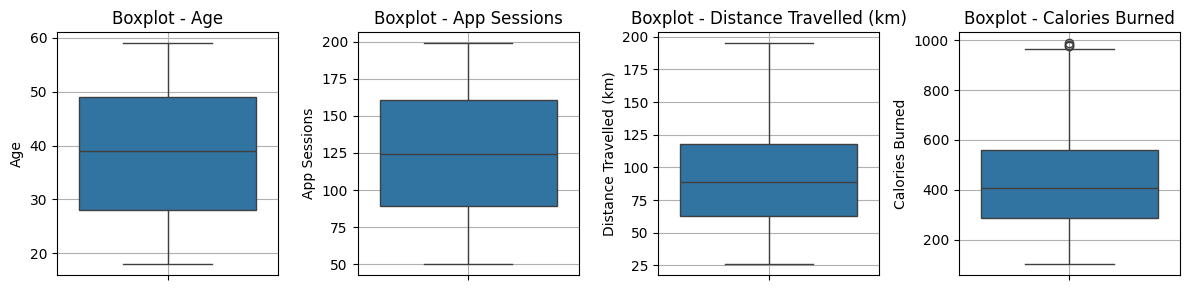

In [ ]:
# --- SEARCHING FOR OUTLIERS ---    

# USING BOXPLOTS
cols_num = ['Age', 'App Sessions', 'Distance Travelled (km)', 'Calories Burned']
fig, axes = plt.subplots(1, 4, figsize=(12, 3))  

for i, col in enumerate(cols_num):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot - {col}')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

C:\Users\fmula\AppData\Local\Temp\ipykernel_41904\3761773400.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette=palette_list[i])
C:\Users\fmula\AppData\Local\Temp\ipykernel_41904\3761773400.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette=palette_list[i])
C:\Users\fmula\AppData\Local\Temp\ipykernel_41904\3761773400.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette=palette_list[i])


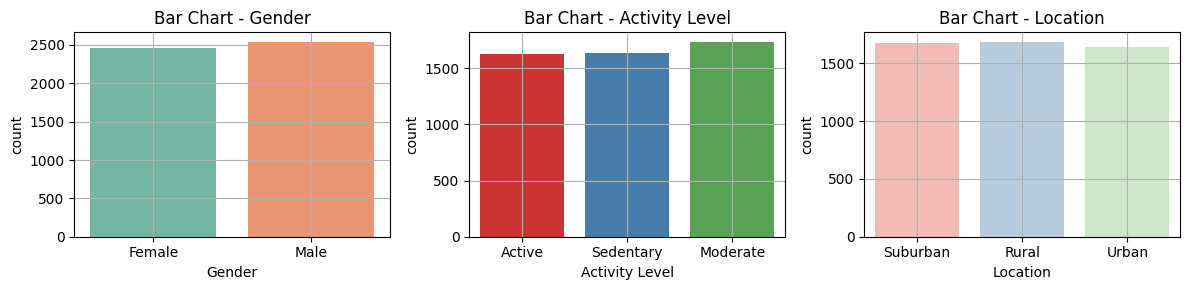

In [ ]:
# USING BAR CHART FOR CATEGORICAL VARIABLES
import seaborn as sns
import matplotlib.pyplot as plt

cols_categ = ['Gender', 'Activity Level', 'Location']
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# Paletas conhecidas do Seaborn
palette_list = ['Set2', 'Set1', 'Pastel1']

for i, col in enumerate(cols_categ):
    sns.countplot(x=col, data=df, ax=axes[i], palette=palette_list[i])
    axes[i].set_title(f'Bar Chart - {col}')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

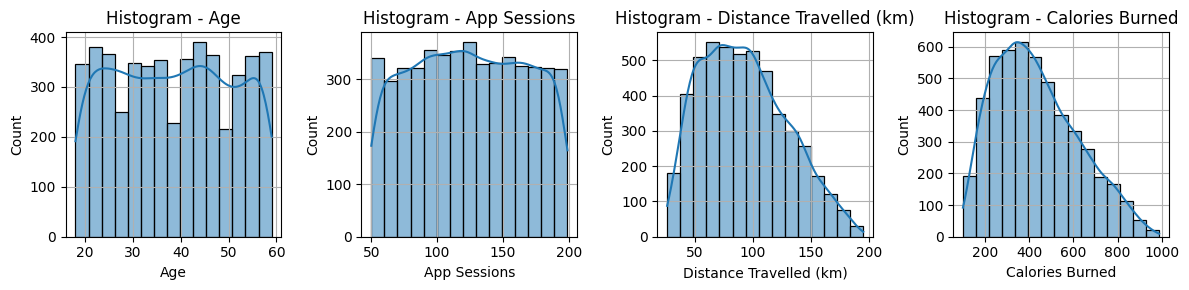

In [33]:
# USING HISTOGRAMS

fig, axes = plt.subplots(1, 4, figsize=(12, 3))  

cols_num = ['Age', 'App Sessions', 'Distance Travelled (km)', 'Calories Burned']

for i, cols_num in enumerate(cols_num):
    sns.histplot(df[cols_num], kde=True, bins=15, ax=axes[i])
    axes[i].set_title(f'Histogram - {cols_num}')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

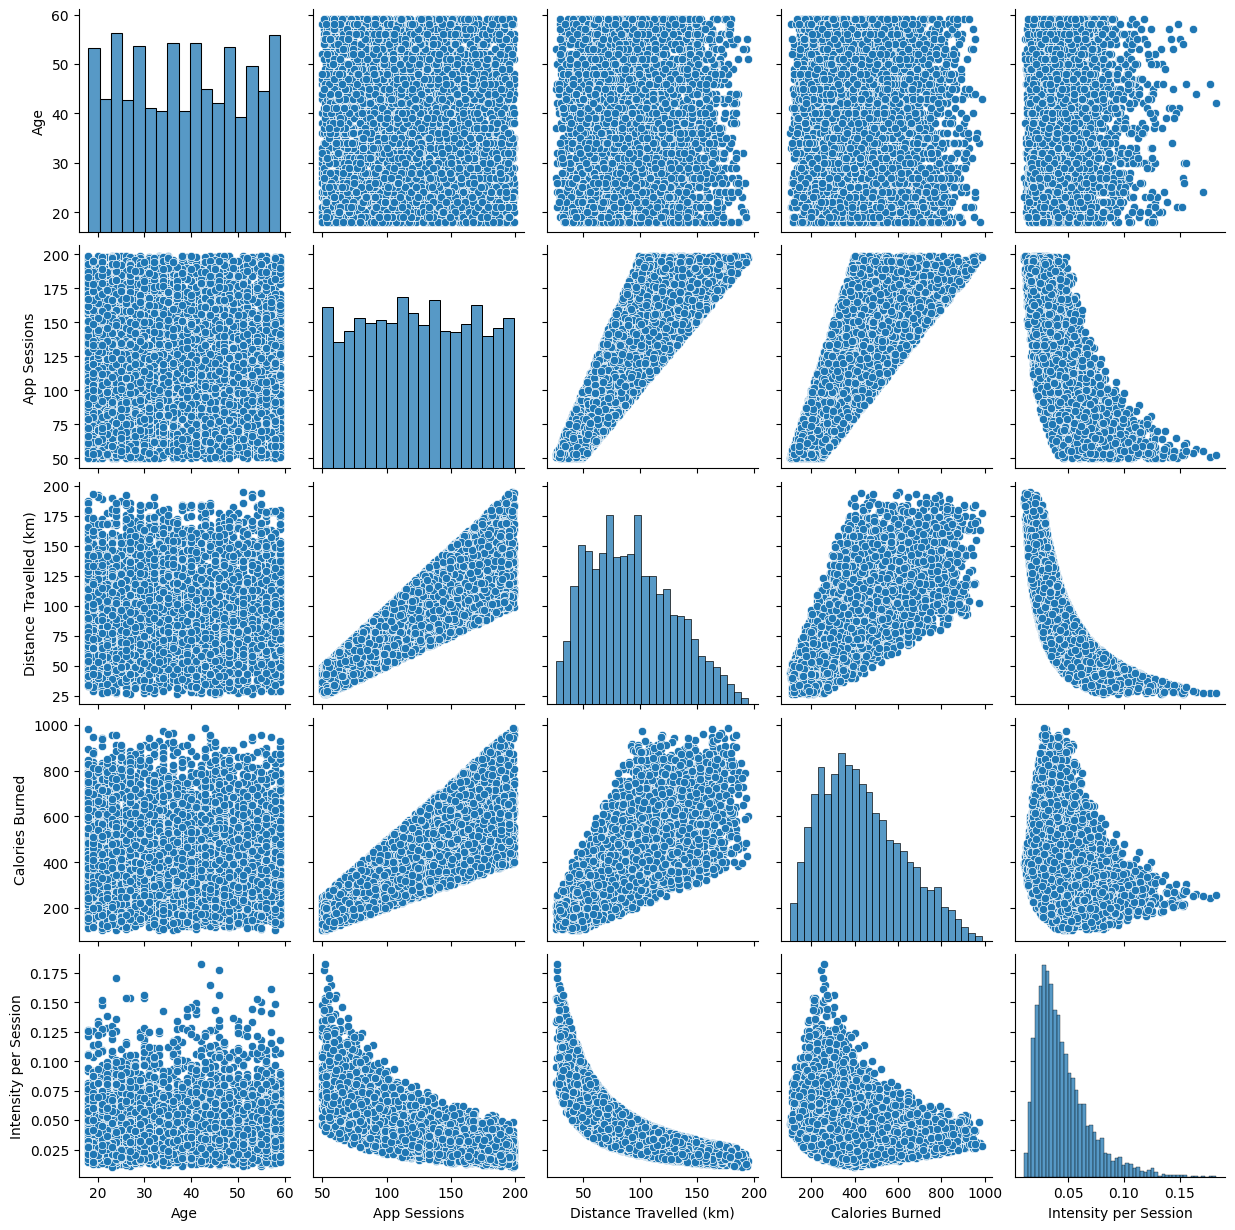

In [18]:
sns.pairplot(df)
plt.show()

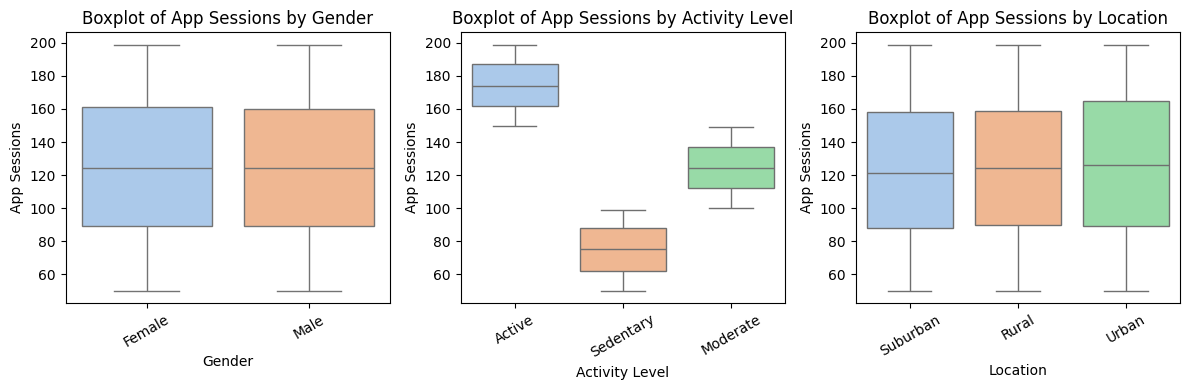

In [39]:
# ANALYSING APP SESSIONS BY INDEPENDENT VARIABLES

cols_x = ['Gender', 'Activity Level', 'Location'] # independent variables or inputs
y = 'App Sessions' # dependent variable or output

fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 1 row x 3 columns

for i, col in enumerate(cols_x):
    sns.boxplot(x=col, y=y, hue=col, data=df, ax=axes[i], palette='pastel', legend=False)
    axes[i].set_title(f'Boxplot of {y} by {col}')
    axes[i].tick_params(axis='x', rotation=30)  # rotate labels

plt.tight_layout()
plt.show()

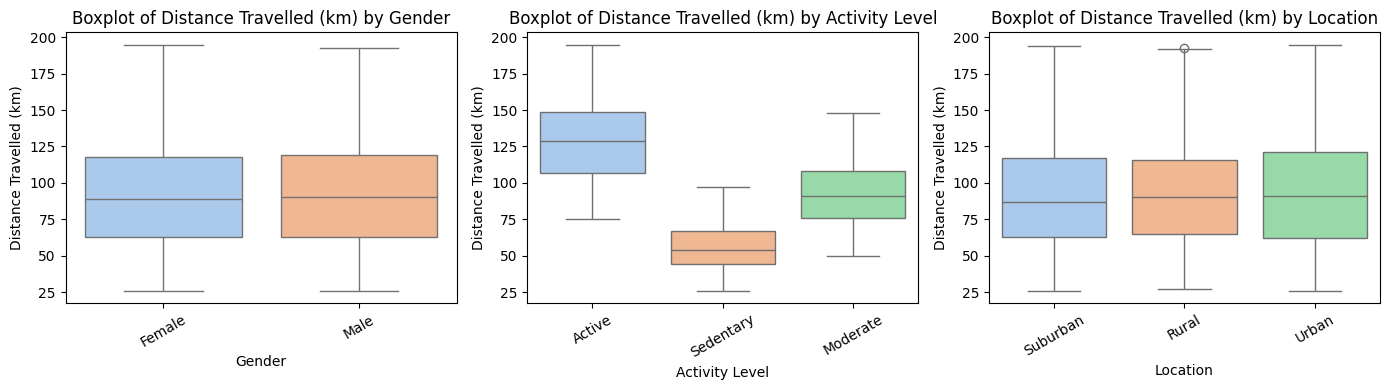

In [9]:
cols_x = ['Gender', 'Activity Level', 'Location']
y = 'Distance Travelled (km)'

fig, axes = plt.subplots(1, 3, figsize=(14, 4))  # 1 linha x 3 colunas

for i, col in enumerate(cols_x):
    sns.boxplot(x=col, y=y, hue=col, data=df, ax=axes[i], palette='pastel', legend=False)
    axes[i].set_title(f'Boxplot of {y} by {col}')
    axes[i].tick_params(axis='x', rotation=30)  # girar labels se necessário

plt.tight_layout()
plt.show()

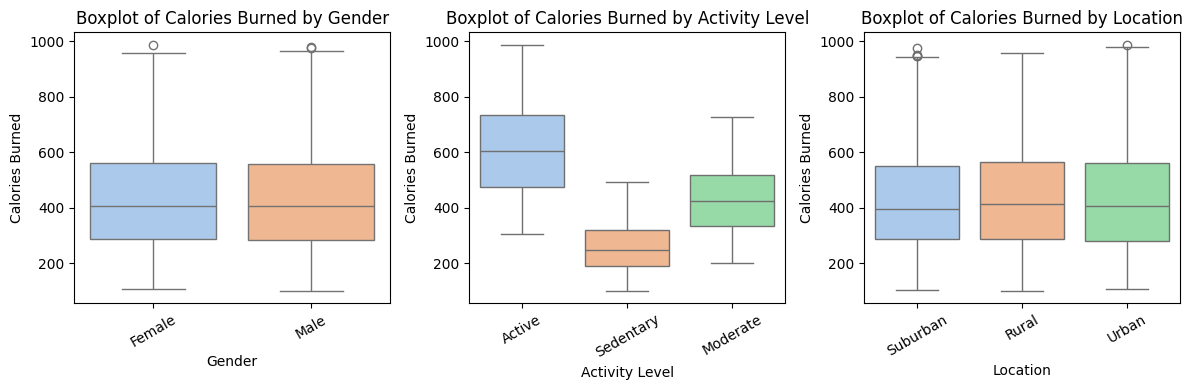

In [10]:
cols_x = ['Gender', 'Activity Level', 'Location']
y = 'Calories Burned'

fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 1 linha x 3 colunas

for i, col in enumerate(cols_x):
    sns.boxplot(x=col, y=y, hue=col, data=df, ax=axes[i], palette='pastel', legend=False)
    axes[i].set_title(f'Boxplot of {y} by {col}')
    axes[i].tick_params(axis='x', rotation=30)  # girar labels se necessário

plt.tight_layout()
plt.show()

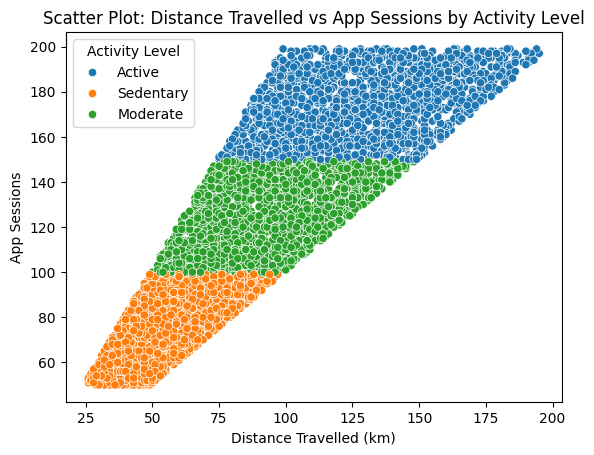

In [11]:
sns.scatterplot(data=df, x='Distance Travelled (km)', y='App Sessions', hue='Activity Level')
plt.title('Scatter Plot: Distance Travelled vs App Sessions by Activity Level')
plt.xlabel('Distance Travelled (km)')
plt.ylabel('App Sessions')
plt.show()

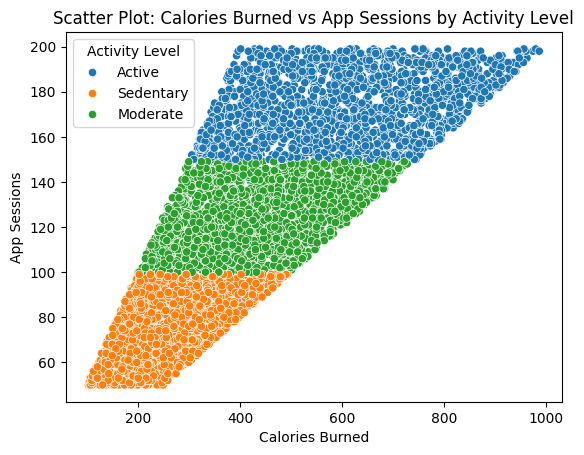

In [12]:
sns.scatterplot(data=df, x='Calories Burned', y='App Sessions', hue='Activity Level')
plt.title('Scatter Plot: Calories Burned vs App Sessions by Activity Level')
plt.xlabel('Calories Burned')
plt.ylabel('App Sessions')
plt.show()

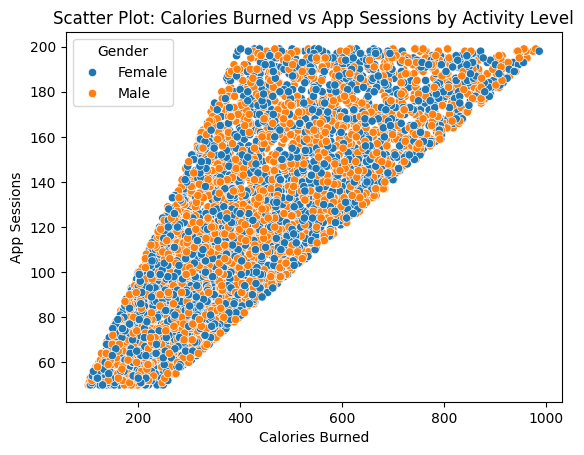

In [13]:
sns.scatterplot(data=df, x='Calories Burned', y='App Sessions', hue='Gender')
plt.title('Scatter Plot: Calories Burned vs App Sessions by Activity Level')
plt.xlabel('Calories Burned')
plt.ylabel('App Sessions')
plt.show()

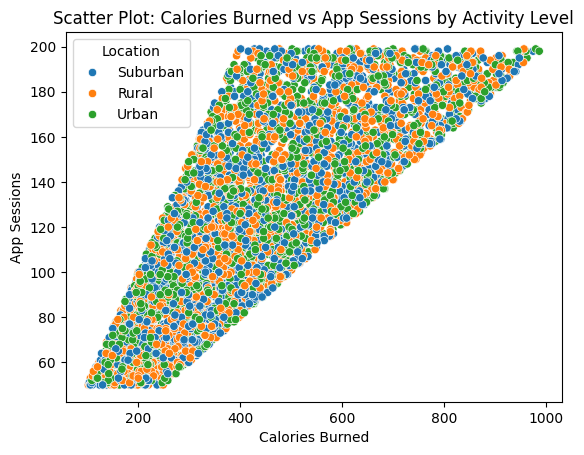

In [14]:
sns.scatterplot(data=df, x='Calories Burned', y='App Sessions', hue='Location')
plt.title('Scatter Plot: Calories Burned vs App Sessions by Activity Level')
plt.xlabel('Calories Burned')
plt.ylabel('App Sessions')
plt.show()

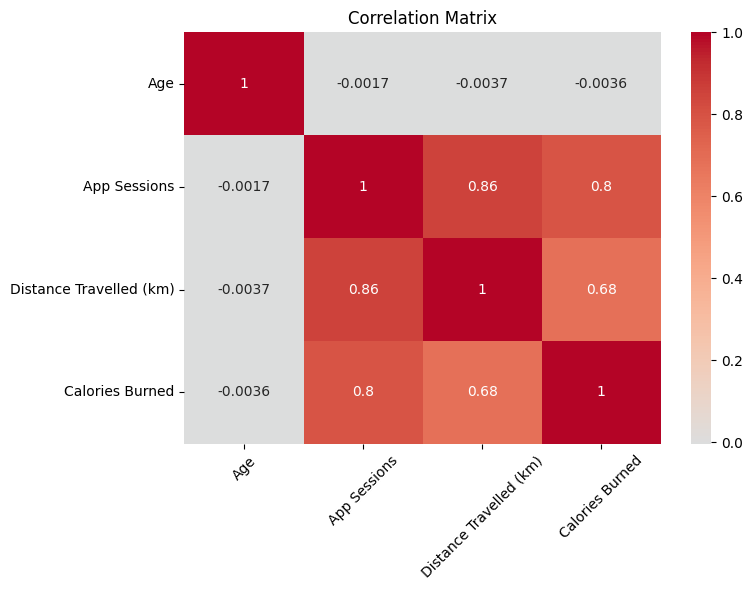

In [ ]:
# ANALYSING CORRELATION BEFORE DATA TRANSFORMATION - ONLY NUMERICAL FEATURES

import seaborn as sns
from matplotlib import pyplot as plt

corr = df[['Age', 'App Sessions', 'Distance Travelled (km)', 'Calories Burned']].corr(method='pearson')  
# Pearson: Used when variables are continuous, normally distributed, and have a linear relationship. Ideal for parametric data. --> used in this case
# Spearman: Used for monotonic (non-linear) relationships, ordinal variables, or when outliers are present. More robust to non-normality.
    
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Feature Engineering: Intensity per Session

A new variable was created by combining existing features to capture the intensity of physical activity normalised by app engagement.  
The formula is:

$$
\text{Intensity per Session} = \frac{{\text{Calories Burned}}/{\text{Distance Travelled (km)}}}{\text{App Sessions}}
$$
 
First, the calories per kilometre ratio is calculated, representing the caloric intensity per distance travelled. This value is then normalised by the number of app sessions to reflect usage frequency.

A higher value of this metric suggests a user who undertakes less frequent but more intense or longer sessions.

In [51]:
# Calculates the average intensity of calories burned per kilometre per app session.
# This metric normalises the calorie expenditure by distance travelled and number of sessions,
# enabling a fairer comparison of user effort regardless of usage frequency or total distance.

df['Intensity per Session'] = (df['Calories Burned'] / df['Distance Travelled (km)']) / df['App Sessions']

In [52]:
# creating a model for knn analyses to predict user behaviour and app usage patterns, like App Sessions, Distance Traveled (km), Calories Burned

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# defining X and y:
X = df[['Age', 'Distance Travelled (km)', 'Calories Burned']]
y = df['App Sessions']

# spliting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#### Baseline models without transformations

In [53]:
# KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Training the model
knn_model.fit(X_train, y_train)

# prediction
y_pred = knn_model.predict(X_test)

# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
mse_knn1 = mean_squared_error(y_test, y_pred)
r2_knn1 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse_knn1}")
print(f"R-squared: {r2_knn1}")

Mean Squared Error: 323.31380000000007
R-squared: 0.8262917159730483


In [ ]:
# do the same but using Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse_rf1 = mean_squared_error(y_test, y_pred)
r2_rf1 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse_rf1}")
print(f"R-squared: {r2_rf1}")

Mean Squared Error: 309.73590900228686
R-squared: 0.833586771568936


In [55]:
# do the same but using linear regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
mse_lr1 = mean_squared_error(y_test, y_pred)
r2_lr1 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse_lr1}")
print(f"R-squared: {r2_lr1}")

Mean Squared Error: 331.92825117843216
R-squared: 0.8216633903895458


In [57]:
# make an analysis of Features importance for App Sessions using random forest regressor
# Do Standarization for X2 to fit t the same scale to avoid bias - not needed for y2
df2 = df.copy()

df2['Gender'] = df2['Gender'].map({'Male': 0, 'Female': 1})
df2['Location'] = df2['Location'].map({'Rural': 0, 'Suburban': 1, 'Urban': 2})
df2['Activity Level'] = df2['Activity Level'].map({'Sedentary': 1, 'Moderate': 2, 'Active': 3})

df2.head(2)

Gender  Age  Activity Level  Location  App Sessions  \
0       1   22               3         1           151   
1       0   50               3         0           157   

   Distance Travelled (km)  Calories Burned  Intensity per Session  
0                      140              728               0.034437  
1                      115              523               0.028967

In [21]:
X = df2.drop(columns=['App Sessions'])
y = df2['App Sessions']


                   Feature  Importance
1  Distance Travelled (km)    0.789085
2          Calories Burned    0.161060
0                      Age    0.049855


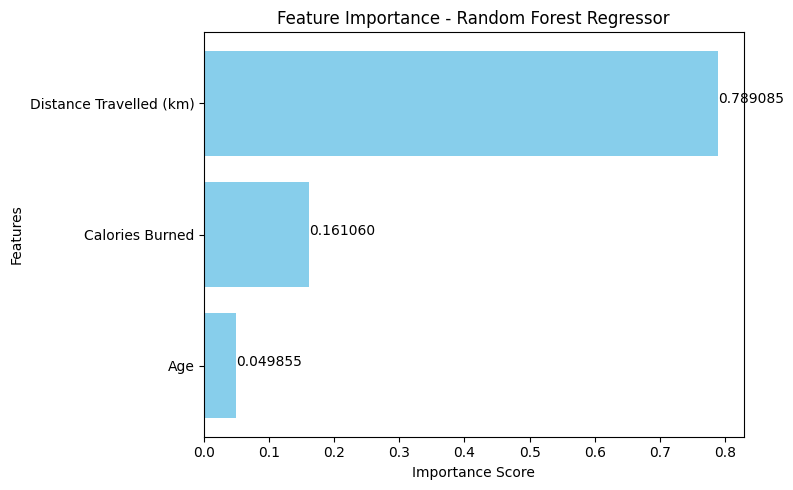

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame to display them nicely
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the table
print(feature_importance_df)

# Optional: plot feature importances
plt.figure(figsize=(8,5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Inverte o eixo Y para mostrar o mais importante no topo

# Adicionando rótulos
plt.title('Feature Importance - Random Forest Regressor')
plt.xlabel('Importance Score')
plt.ylabel('Features')

# Exibir valores no final das barras (opcional)
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value, index, f'{value:.6f}')

plt.tight_layout()
plt.show()

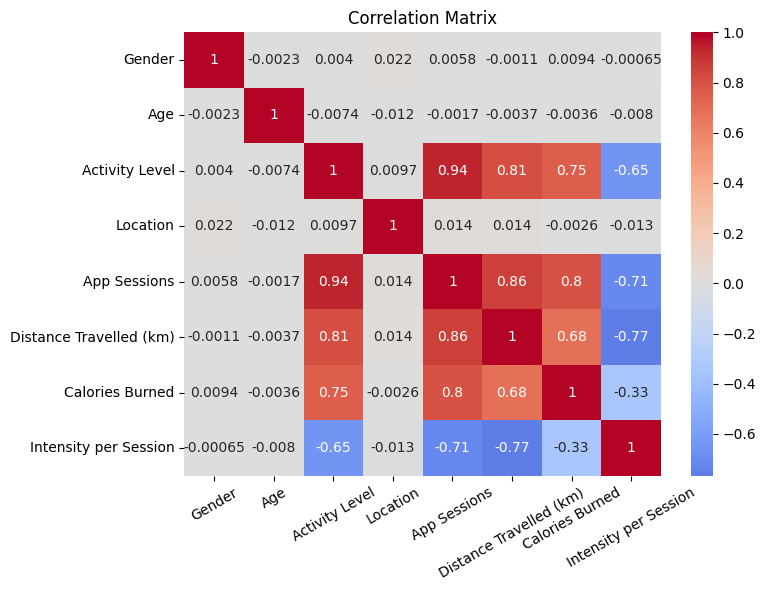

In [62]:
# ANALYSING CORRELATION AFTER DATA TRANSFORMATION

import seaborn as sns
from matplotlib import pyplot as plt

corr = df2.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [24]:
df2.head(3)

Gender  Age  Activity Level  Location  App Sessions  \
0       1   22               3         1           151   
1       0   50               3         0           157   
2       0   36               3         2           178   

   Distance Travelled (km)  Calories Burned  
0                      140              728  
1                      115              523  
2                      163              795

In [25]:
#X2 = df2.drop(columns=['Calories Burned'])
X2 = df2.drop(columns=['App Sessions', 'Gender', 'Age', 'Location']) # drop features less important to simplify the model
y2 = df2['App Sessions']

X2.head(3)

Activity Level  Distance Travelled (km)  Calories Burned
0               3                      140              728
1               3                      115              523
2               3                      163              795

In [26]:
y2.head(3)

0    151
1    157
2    178
Name: App Sessions, dtype: int64

In [27]:
# Do Standarization for X2 to fit t the same scale to avoid bias - not needed for y2
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

# checking transformations
X2[0:3]

array([[1.23780048, 1.29141193, 1.57774974],
       [1.23780048, 0.61099949, 0.48388367],
       [1.23780048, 1.91739137, 1.93525719]])

In [28]:
# Do a prediction of Calories Burned using the Random Forest Regressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse_rf2 = mean_squared_error(y_test, y_pred)
r2_rf2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse_rf2}")
print(f"R-squared: {r2_rf2}")

Mean Squared Error: 139.26755381773594
R-squared: 0.9251750844092951


In [29]:
# do the same for KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
mse_knn2 = mean_squared_error(y_test, y_pred)
r2_knn2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse_knn2}")
print(f"R-squared: {r2_knn2}")

Mean Squared Error: 136.374
R-squared: 0.9267297173028447


In [30]:
# now for LinearRegression
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
mse_lr2 = mean_squared_error(y_test, y_pred)
r2_lr2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse_lr2}")
print(f"R-squared: {r2_lr2}")

Mean Squared Error: 140.74320170284278
R-squared: 0.9243822563210726


In [31]:
# now for XGBoost
from xgboost import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
mse_xgb2 = mean_squared_error(y_test, y_pred)
r2_xgb2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse_xgb2}")
print(f"R-squared: {r2_xgb2}")


Mean Squared Error: 134.0664825439453
R-squared: 0.9279694557189941


In [32]:
# Dataframe to compare metrics for models

models = ['LinearRegression 1', 'LinearRegression 2',
          'K-NeighborsRegressor 1', 'K-NeighborsRegressor 2',
          'RandomForestRegressor 1', 'RandomForestRegressor 2',
          'XGBoost']
mse_values = [mse_lr1, mse_lr2,
              mse_knn1, mse_knn2,
              mse_rf1, mse_rf2,
              mse_xgb2]
r2_values = [r2_lr1, r2_lr2,
             r2_knn1, r2_knn2,
             r2_rf1, r2_rf2,
             r2_xgb2]

metrics_df = pd.DataFrame({
    'Model': models,
    'Mean Squared Error': mse_values,
    'R-squared': r2_values
})

metrics_df[['Mean Squared Error', 'R-squared']] = metrics_df[['Mean Squared Error', 'R-squared']].round(3)

In [33]:
metrics_df.sort_values(by="R-squared", ascending=False).reset_index(drop=True)

Model  Mean Squared Error  R-squared
0                  XGBoost             134.066      0.928
1   K-NeighborsRegressor 2             136.374      0.927
2  RandomForestRegressor 2             139.268      0.925
3       LinearRegression 2             140.743      0.924
4  RandomForestRegressor 1             309.736      0.834
5   K-NeighborsRegressor 1             323.314      0.826
6       LinearRegression 1             331.928      0.822

In [34]:
# try to improve the results even more

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# using Gridsearch for XGBoost, KNeighborsRegressor and Random Forest Regressor

# XGBoost
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 2, 3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

xgb_model_opt = XGBRegressor()
grid_search_xgb = GridSearchCV(xgb_model_opt, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train, y_train)

best_params = grid_search_xgb.best_params_
best_model = XGBRegressor(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
mse_xgb3 = mean_squared_error(y_test, y_pred)
r2_xgb3 = r2_score(y_test, y_pred)
print(f"XGBRegressor_optimized")
print(f"Mean Squared Error: {mse_xgb3}")
print(f"R-squared: {r2_xgb3}")
print(best_params)

XGBRegressor_optimized
Mean Squared Error: 115.50733947753906
R-squared: 0.9379408359527588
{'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 1.0}


In [35]:
# KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30],
    'p': [1, 2, 3]
}

knn_model_opt = KNeighborsRegressor()
grid_search_knn = GridSearchCV(knn_model_opt, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_knn.fit(X_train, y_train)

best_params = grid_search_knn.best_params_
best_model = KNeighborsRegressor(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
mse_knn3 = mean_squared_error(y_test, y_pred)
r2_knn3 = r2_score(y_test, y_pred)
print(f"KNeighborsRegressor_optimized")
print(f"Mean Squared Error: {mse_knn3}")
print(f"R-squared: {r2_knn3}")
print(best_params)


KNeighborsRegressor_optimized
Mean Squared Error: 133.10414285714288
R-squared: 0.928486528404935
{'algorithm': 'ball_tree', 'leaf_size': 30, 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


In [36]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_model_opt = RandomForestRegressor()
grid_search_rf = GridSearchCV(rf_model_opt, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

best_params = grid_search_rf.best_params_
best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
mse_rf3 = mean_squared_error(y_test, y_pred)
r2_rf3 = r2_score(y_test, y_pred)
print(f"RandomForestRegressor_optimized")
print(f"Mean Squared Error: {mse_rf3}")
print(f"R-squared: {r2_rf3}")
print(best_params)

c:\Users\fmula\.conda\envs\ML\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\fmula\.conda\envs\ML\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\fmula\.conda\envs\ML\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\fmula\.conda\envs\ML\Lib\site-packages\sklearn\base.py", line 436, 

RandomForestRegressor_optimized
Mean Squared Error: 116.0796948245162
R-squared: 0.937633331462069
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [37]:
# Dataframe to compare metrics for models

models = ['LinearRegression 1', 'LinearRegression 2',
          'K-NeighborsRegressor 1', 'K-NeighborsRegressor 2',
          'RandomForestRegressor 1', 'RandomForestRegressor 2',
          'XGBoost', 'RandomForestRegressor_optimized',
          'KNeighborsRegressor_optimized', 'XGBoost_optimized']
mse_values = [mse_lr1, mse_lr2,
              mse_knn1, mse_knn2,
              mse_rf1, mse_rf2,
              mse_xgb2, mse_rf3,
              mse_knn3, mse_xgb3]
r2_values = [r2_lr1, r2_lr2,
             r2_knn1, r2_knn2,
             r2_rf1, r2_rf2,
             r2_xgb2, r2_rf3,
             r2_knn3, r2_xgb3]

metrics_df = pd.DataFrame({
    'Model': models,
    'Mean Squared Error': mse_values,
    'R-squared': r2_values
})

metrics_df[['Mean Squared Error', 'R-squared']] = metrics_df[['Mean Squared Error', 'R-squared']].round(6)
all_metrics = metrics_df.sort_values(by="R-squared", ascending=False).reset_index(drop=True)
all_metrics

Model  Mean Squared Error  R-squared
0                XGBoost_optimized          115.507339   0.937941
1  RandomForestRegressor_optimized          116.079695   0.937633
2    KNeighborsRegressor_optimized          133.104143   0.928487
3                          XGBoost          134.066483   0.927969
4           K-NeighborsRegressor 2          136.374000   0.926730
5          RandomForestRegressor 2          139.267554   0.925175
6               LinearRegression 2          140.743202   0.924382
7          RandomForestRegressor 1          309.735909   0.833587
8           K-NeighborsRegressor 1          323.313800   0.826292
9               LinearRegression 1          331.928251   0.821663

C:\Users\fmula\AppData\Local\Temp\ipykernel_640\1457782472.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R-squared', y='Model', data=top5, palette='Blues_d')


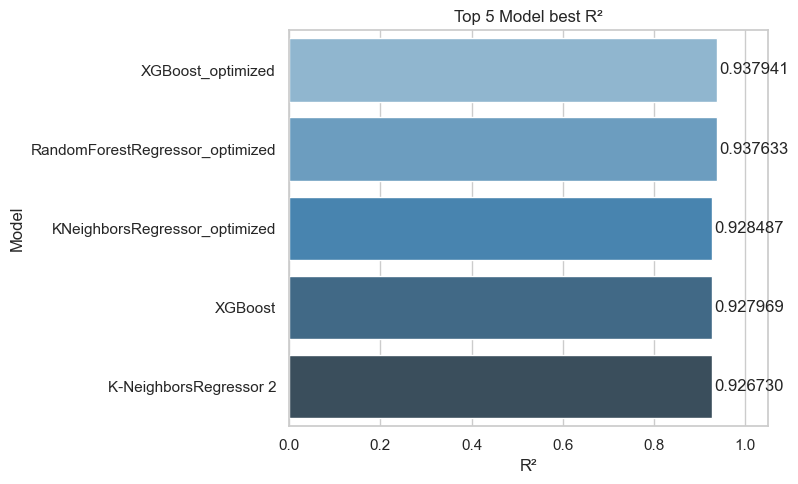

In [38]:
# Graphs with best 5 moldels

top5 = all_metrics.head(5)

sns.set(style="whitegrid")

# Gráfico de barras horizontais
plt.figure(figsize=(8, 5))
sns.barplot(x='R-squared', y='Model', data=top5, palette='Blues_d')

# Adicionar rótulos
for index, value in enumerate(top5['R-squared']):
    plt.text(value + 0.005, index, f"{value:.6f}", va='center')

plt.title("Top 5 Model best R²")
plt.xlabel("R²")
plt.ylabel("Model")
plt.xlim(0, 1.05)
plt.tight_layout()
plt.show()

In [65]:
# use models for clustering

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)
df['Cluster'] = y_pred


In [63]:
df

Gender  Age Activity Level  Location  App Sessions  \
0     Female   22         Active  Suburban           151   
1       Male   50         Active     Rural           157   
2       Male   36         Active     Urban           178   
3     Female   36         Active  Suburban           155   
4       Male   34      Sedentary     Rural            95   
...      ...  ...            ...       ...           ...   
4995  Female   50         Active     Urban           155   
4996  Female   37       Moderate     Rural           127   
4997  Female   47       Moderate  Suburban           140   
4998  Female   59      Sedentary  Suburban            85   
4999  Female   43       Moderate     Urban           143   

      Distance Travelled (km)  Calories Burned  Intensity per Session  
0                         140              728               0.034437  
1                         115              523               0.028967  
2                         163              795               0.027401  
3                          85              715               0.054269  
4                          71              439               0.065085  
...                       ...              ...                    ...  
4995                      151              502               0.021448  
4996                       84              586               0.054931  
4997                      116              649               0.039963  
4998                       63              301               0.056209  
4999                      111              540               0.034020  

[5000 rows x 8 columns]

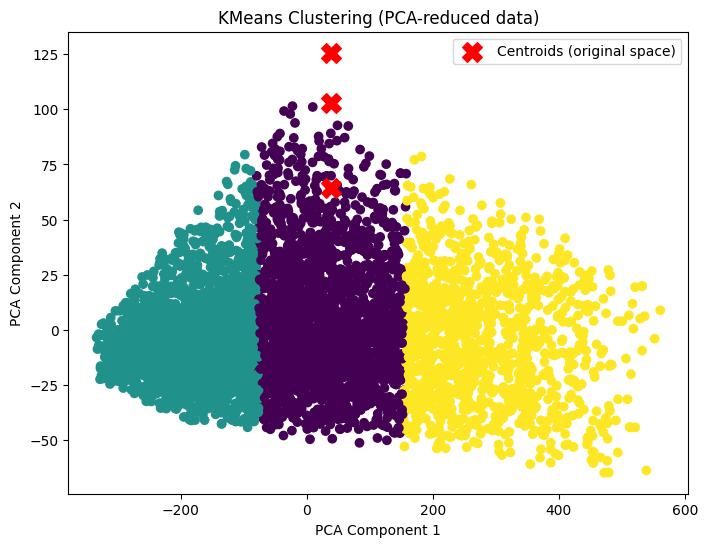

In [66]:
# Visualize the clusters
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids (original space)')
plt.title("KMeans Clustering (PCA-reduced data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


In [67]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, y_pred)
print(f"Silhouette Score: {score:.2f}")  # Quanto mais próximo de 1, melhor

Silhouette Score: 0.51


In [68]:
print(kmeans.inertia_) # Quanto menor, melhor — mas tende a sempre diminuir conforme aumentam os clusters.

30222858.55999276


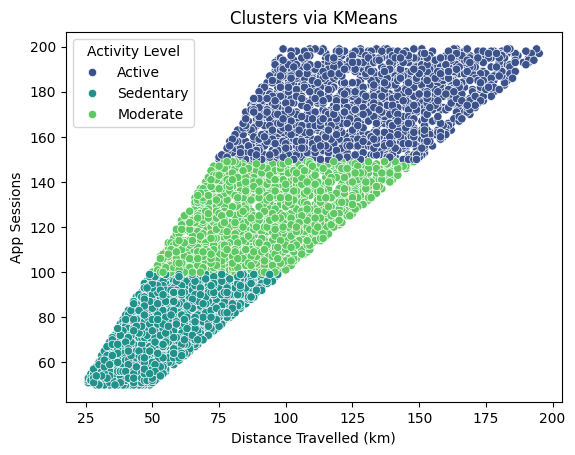

In [69]:
import seaborn as sns

sns.scatterplot(data=df, x='Distance Travelled (km)', y='App Sessions', hue='Activity Level', palette='viridis')
plt.title("Clusters via KMeans")
plt.show()

In [45]:
!pip install kmodes

  Using cached kmodes-0.12.2-py2.py3-none-any.whl.metadata (8.1 kB)
Using cached kmodes-0.12.2-py2.py3-none-any.whl (20 kB)


In [70]:
from kmodes.kprototypes import KPrototypes
import numpy as np

# Converter o DataFrame para array do numpy (valores como string para as categorias)
data = df.copy()
data_matrix = data.values

data

Gender  Age Activity Level  Location  App Sessions  \
0     Female   22         Active  Suburban           151   
1       Male   50         Active     Rural           157   
2       Male   36         Active     Urban           178   
3     Female   36         Active  Suburban           155   
4       Male   34      Sedentary     Rural            95   
...      ...  ...            ...       ...           ...   
4995  Female   50         Active     Urban           155   
4996  Female   37       Moderate     Rural           127   
4997  Female   47       Moderate  Suburban           140   
4998  Female   59      Sedentary  Suburban            85   
4999  Female   43       Moderate     Urban           143   

      Distance Travelled (km)  Calories Burned  Intensity per Session  Cluster  
0                         140              728               0.034437        2  
1                         115              523               0.028967        0  
2                         163              795               0.027401        2  
3                          85              715               0.054269        2  
4                          71              439               0.065085        0  
...                       ...              ...                    ...      ...  
4995                      151              502               0.021448        0  
4996                       84              586               0.054931        0  
4997                      116              649               0.039963        2  
4998                       63              301               0.056209        1  
4999                      111              540               0.034020        0  

[5000 rows x 9 columns]

In [71]:
# Identificar os índices das colunas categóricas (baseado na ordem no DataFrame)
categorical_columns = [0, 2, 3]  #

# Aplicar K-Prototypes
kproto = KPrototypes(n_clusters=3, init='Cao', verbose=2)
clusters = kproto.fit_predict(data_matrix, categorical=categorical_columns)

# Atribuir os clusters de volta ao DataFrame
df['Cluster'] = clusters
print(df)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1315, ncost: 35732544.79975525
Run: 1, iteration: 2/100, moves: 293, ncost: 34507038.968329415
Run: 1, iteration: 3/100, moves: 152, ncost: 34237134.33786459
Run: 1, iteration: 4/100, moves: 83, ncost: 34150603.12218082
Run: 1, iteration: 5/100, moves: 81, ncost: 34078275.783976614
Run: 1, iteration: 6/100, moves: 46, ncost: 34048169.44580981
Run: 1, iteration: 7/100, moves: 37, ncost: 34036912.10662199
Run: 1, iteration: 8/100, moves: 19, ncost: 34031348.07304645
Run: 1, iteration: 9/100, moves: 14, ncost: 34029174.86370199
Run: 1, iteration: 10/100, moves: 5, ncost: 34028873.125376195
Run: 1, iteration: 11/100, moves: 1, ncost: 34028860.03010725
Run: 1, iteration: 12/100, moves: 0, ncost: 34028860.03010725
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, itera

In [72]:
print("Centroides numéricos:")
print(kproto.cluster_centroids_[0])

print("Centroides categóricos:")
print(kproto.cluster_centroids_[1])

Centroides numéricos:
['38.60354430379747' '137.52303797468355' '102.93924050632911'
 '454.2870886075949' '0.03825268180470903' '0.033924050632911394' 'Male'
 'Moderate' 'Rural']
Centroides categóricos:
['38.06' '169.67727272727274' '125.7090909090909' '710.6590909090909'
 '0.0356510460262814' '1.9745454545454546' 'Male' 'Active' 'Urban']


In [73]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que você já tem os centróides:
centroids_num = kproto.cluster_centroids_[0]
centroids_cat = kproto.cluster_centroids_[1]

# Colunas numéricas e categóricas
num_cols = ['Age', 'App Sessions', 'Distance Travelled (km)', 'Calories Burned']
cat_cols = ['Gender', 'Activity Level', 'Location']

# Plotando centróides numéricos
df_centroids_num = pd.DataFrame(centroids_num, columns=num_cols)
df_centroids_num.index = [f'Cluster {i}' for i in range(len(df_centroids_num))]

df_centroids_num.plot(kind='bar', figsize=(8,5))
plt.title("Centroid numbers per Cluster")
plt.ylabel("Valor médio")
plt.xticks(rotation=0)
plt.show()

# Mostrando centróides categóricos por cluster
print("Centroides categóricos por cluster:")
for i, centroid in enumerate(centroids_cat):
    print(f"Cluster {i}:")
    for col, val in zip(cat_cols, centroid):
        print(f"  {col}: {val}")


ValueError: Shape of passed values is (9, 1), indices imply (9, 4)

In [ ]:
!pip install gower


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import gower
from sklearn.metrics import silhouette_score

# Calcular matriz de distâncias Gower (suporta dados mistos)
dist_matrix = gower.gower_matrix(data)

# silhouette_score espera rótulos e matriz de distâncias pré-calculada
score = silhouette_score(dist_matrix, clusters, metric='precomputed')
print(f"Silhouette Score (Gower distance): {score:.3f}")

Silhouette Score (Gower distance): 0.294


Clusters: 2, Silhouette Score: 0.223
Clusters: 3, Silhouette Score: 0.308
Clusters: 4, Silhouette Score: 0.128
Clusters: 5, Silhouette Score: 0.083
Clusters: 6, Silhouette Score: 0.057


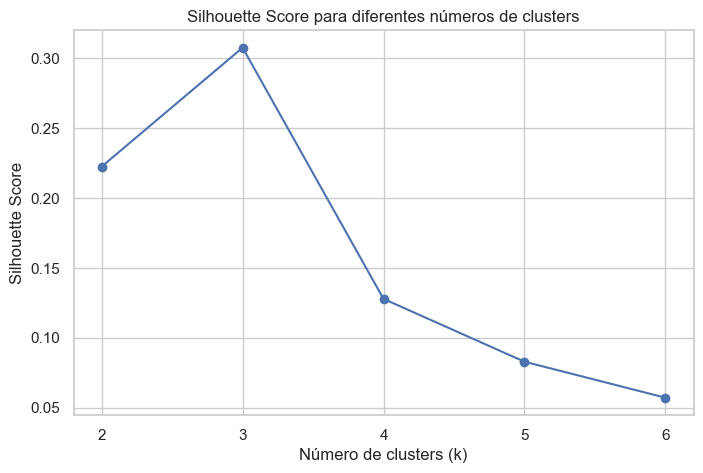

In [ ]:
import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes
import gower
from sklearn.metrics import silhouette_score
import pandas as pd

categorical_columns = [0, 2, 3]

silhouette_scores = []

for k in range(2, 7):
    kproto = KPrototypes(n_clusters=k, init='Cao', verbose=0, random_state=42)
    clusters = kproto.fit_predict(df.values, categorical=categorical_columns)

    dist_matrix = gower.gower_matrix(df)
    score = silhouette_score(dist_matrix, clusters, metric='precomputed')
    silhouette_scores.append(score)
    print(f"Clusters: {k}, Silhouette Score: {score:.3f}")

# Plotando o gráfico
plt.figure(figsize=(8,5))
plt.plot(range(2,7), silhouette_scores, marker='o')
plt.title('Silhouette Score for differents clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2,7))
plt.grid(True)
plt.show()


--> Feature selection (escolher variáveis melhores)

Tente rodar com subsets diferentes de variáveis.

Menos variáveis às vezes melhoram a coerência dos clusters.

--> Testar outras técnicas

Hierarchical clustering + Gower às vezes dá melhor separação.

Testar também HDBSCAN (aceita Gower e gera clusters mais naturais, sem forçar k).

In [ ]:
# elbony methos, poegar valores medios de cada cluster --> perfil de cada um

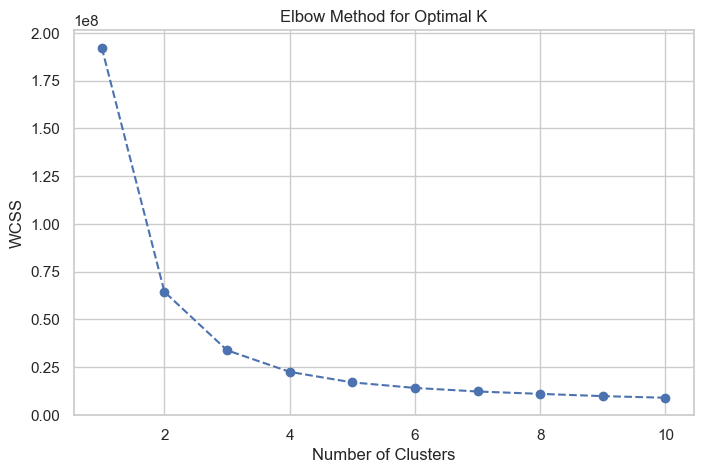

In [51]:
wcss = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker="o", linestyle="--")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

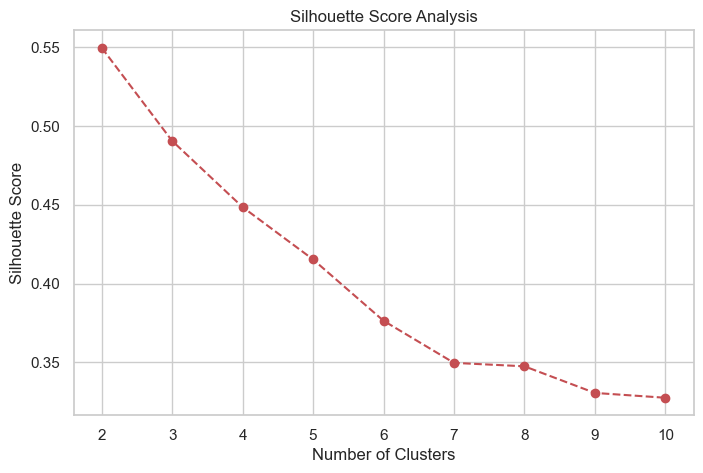

In [52]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df2)
    silhouette_scores.append(silhouette_score(df2, labels))

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker="o", linestyle="--", color='r')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Analysis")
plt.show()

From the graphs:

**Elbow Method (WCSS):**

The "elbow" point appears at K = 3 ou k = 4, where the rate of decrease in WCSS slows down significantly.
This indicates diminishing returns in improving clustering by adding more clusters after 5.

**Silhouette Score:**

The highest silhouette score is observed at K = 2, which suggests that the clustering quality is optimal when there are 2 clusters, then decrease.

Since K = 3 or 4 is the elbow point and the silhouette score at K = 2 is the maximum, It is recommend starting with K = 2 or 3 for simplicity and interpretability.

In [74]:
# Applying K-Means Clustering

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df2)

In [75]:
# Visualizing Clusters Characteristics


# Gender	Age	Activity Level	Location	App Sessions	Distance Travelled (km)	Calories Burned

numeric_columns = df.select_dtypes(include=['number'])

# Group and calculate mean
cluster_summary = numeric_columns.groupby('Cluster').mean()

# Show results in a dataframe
cluster_summary

Age  App Sessions  Distance Travelled (km)  Calories Burned  \
Cluster                                                                      
0        38.604451    137.494689               102.899848       454.188164   
1        38.060000    169.677273               125.709091       710.659091   
2        38.445658     84.950598                62.942798       250.611024   

         Intensity per Session  
Cluster                         
0                     0.038278  
1                     0.035651  
2                     0.056736

In [76]:
# 1. Variáveis numéricas: média por cluster
numeric_columns = df.select_dtypes(include=['number'])
cluster_summary_numeric = numeric_columns.groupby('Cluster').mean()

# 2. Variáveis categóricas: moda por cluster
categorical_columns = df.select_dtypes(include=['object', 'category'])

# Criar dicionário para armazenar a moda de cada categoria por cluster
cluster_modes = {}

for col in categorical_columns.columns:
    mode_per_cluster = df.groupby('Cluster')[col].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    cluster_modes[col] = mode_per_cluster

# 3. Converter o dicionário para DataFrame
cluster_summary_categorical = pd.DataFrame(cluster_modes)

# 4. Juntar os dois resumos (numérico + categórico)
cluster_summary = pd.concat([cluster_summary_numeric, cluster_summary_categorical], axis=1)

# 5. Exibir resultado
cluster_summary

Age  App Sessions  Distance Travelled (km)  Calories Burned  \
Cluster                                                                      
0        38.604451    137.494689               102.899848       454.188164   
1        38.060000    169.677273               125.709091       710.659091   
2        38.445658     84.950598                62.942798       250.611024   

         Intensity per Session Gender Activity Level  Location  
Cluster                                                         
0                     0.038278   Male       Moderate     Rural  
1                     0.035651   Male         Active     Urban  
2                     0.056736   Male      Sedentary  Suburban

In [77]:
# Criar dicionário para armazenar moda e % de frequência
categorical_modes_freq = {}

for col in categorical_columns.columns:
    mode_info = df.groupby('Cluster')[col].agg(
        lambda x: pd.Series({
            'Moda': x.mode().iloc[0] if not x.mode().empty else None,
            'Frequência (%)': round(100 * (x.value_counts(normalize=True).iloc[0]), 1)
        })
    )
    categorical_modes_freq[col] = mode_info

# Concatenar resultados de todas as colunas categóricas
categorical_summary = pd.concat(categorical_modes_freq, axis=1)

# Ajustar multi-índice (coluna → linha)
#categorical_summary.columns = [''.join(col).strip() for col in categorical_summary.columns.values]
categorical_summary.columns = [''.join(col).strip().replace(' ', '_') for col in categorical_summary.columns.values]

categorical_summary.reset_index(inplace=True)


cluster_summary = pd.concat([cluster_summary_numeric, categorical_summary], axis=1)

# Exibir
cluster_summary


Age  App Sessions  Distance Travelled (km)  Calories Burned  \
0  38.604451    137.494689               102.899848       454.188164   
1  38.060000    169.677273               125.709091       710.659091   
2  38.445658     84.950598                62.942798       250.611024   

   Intensity per Session  Cluster        Gender     Activity_Level  \
0               0.038278        0  [Male, 51.3]   [Moderate, 52.3]   
1               0.035651        1  [Male, 50.5]     [Active, 81.1]   
2               0.056736        2  [Male, 50.3]  [Sedentary, 72.9]   

           Location  
0     [Rural, 34.5]  
1     [Urban, 34.6]  
2  [Suburban, 34.8]

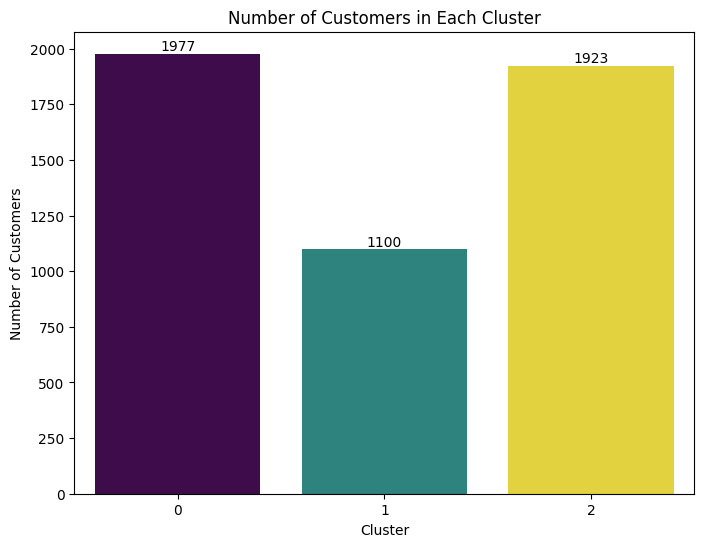

In [78]:
import seaborn as sns


# Calcular as contagens dos clusters
cluster_counts = df['Cluster'].value_counts().sort_index()

# Criar o gráfico de barras com Seaborn
plt.figure(figsize=(8, 6)) # Define o tamanho da figura antes de plotar
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis', hue=cluster_counts.index, legend=False)

plt.title("Number of Customers in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)

# Adicionar os rótulos de valor em cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.show()

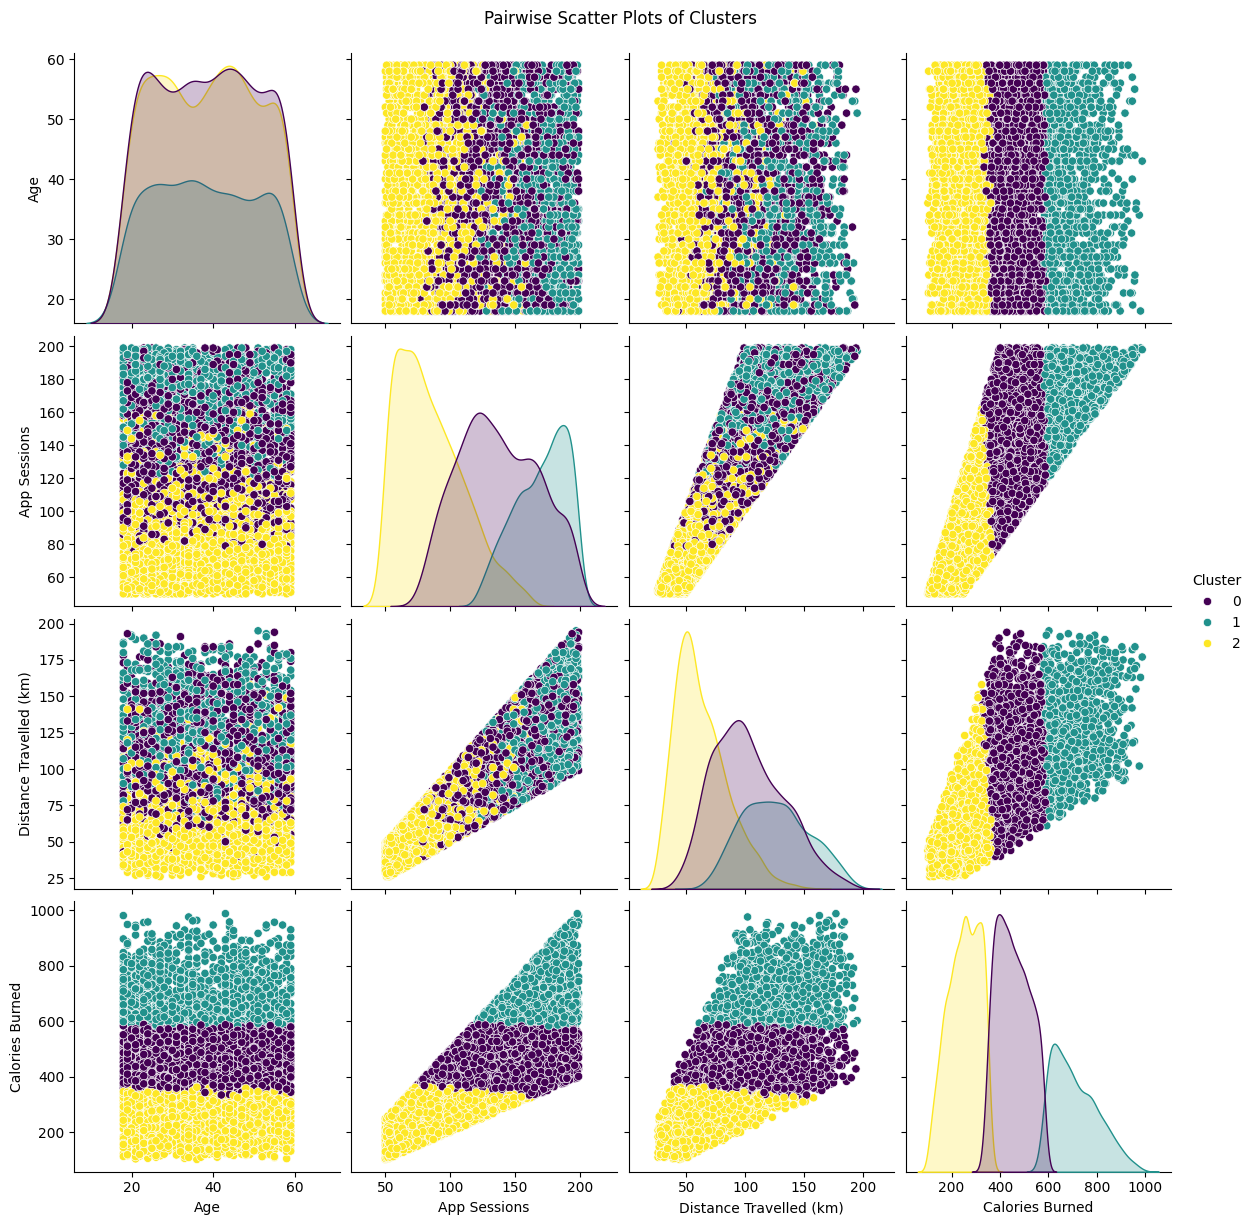

In [79]:
sns.pairplot(
    df[['Gender', 'Age', 'Activity Level', 'App Sessions', 'Distance Travelled (km)', 'Calories Burned', 'Location', 'Cluster']],
    hue='Cluster',
    palette='viridis',
    diag_kind='kde',
    height=3
)

plt.suptitle("Pairwise Scatter Plots of Clusters", y=1.02)
plt.show()

### Cluster Analysis 

All clusters have relatively similar age distributions, so age is not a primary driver of app engagement.


#### **Cluster 0: Moderately Active**
Average Age: 38.6 years  
App Sessions: 137  
Average Distance Travelled: 102.9 km  
Calories Burned: 454 kcal  
Predominant Gender: Male (51.3%)  
Activity Level: Moderate (52.3%)  
Location: Rural (34.5%)  

Interpretation: This group consists of users who are moderately active and live mostly in rural areas. Their level of app usage suggests a steady, consistent engagement with physical activity.

Suggested Features: Personalised progress plans and milestone tracking. These users show steady engagement and a moderate level of physical activity. To support them, the app should offer custom weekly plans that gradually increase in intensity. Additionally, features like milestone tracking (e.g., “100 km total walked”), and gentle performance tips can help maintain motivation and foster progression without overwhelming the user. Provide personalised plans that gradually increase in difficulty. Add in-app reminders and progress tracking to nudge them towards higher engagement. Use milestone rewards (e.g., badges for 100km walked or 30 active days).

#### **Cluster 1: Highly Active**
Average Age: 38.1 years  
App Sessions: 170  
Average Distance Travelled: 125.7 km  
Calories Burned: 711 kcal  
Predominant Gender: Male (50.5%)  
Activity Level: Active (81.1%)  
Location: Urban (34.6%)  

Interpretation: These are the most physically active users. With the highest number of app sessions, greater distance covered, and significantly more calories burned, they appear to be performance-driven and motivated by measurable outcomes.

Suggested Features: Advanced analytics and wearable device integration. This segment is likely to appreciate detailed performance metrics, weekly reports, leaderboards, and training suggestions based on their activity data. Introduce advanced performance metrics (VO2 max, pace, progression tracking). Offer integration with wearables (e.g., smartwatches, heart rate monitors). Enable social/community features like leaderboards, challenges, or shared goals.

#### **Cluster 2: Sedentary**
Average Age: 38.4 years  
App Sessions: 85  
Average Distance Travelled: 62.9 km  
Calories Burned: 251 kcal  
Predominant Gender: Male (50.3%)  
Activity Level: Sedentary (72.9%)  
Location: Suburban (34.8%)  

Interpretation: This group has the lowest activity levels, both in terms of physical performance and app usage. The sedentary lifestyle suggests a need for greater encouragement and onboarding support.  

Suggested Features: Gamified challenges and motivational reminders. These users would benefit from light, accessible incentives, such as daily step goals, achievement badges, and friendly nudges to increase engagement and form healthy habits. Gamify the onboarding process (e.g., streaks, daily mini-goals). Offer “starter” fitness paths — very low barrier exercises with visual encouragement. Include push notifications and weekly summaries to maintain awareness.

Implications for Software Engineering Decisions
Feature Prioritisation:
Cluster insights can guide which features to build or improve. For example:

Advanced metrics for active users (Cluster 1)
Motivational elements for low users (Cluster 2)

Personalisation & Targeting:
Enable user-tailored experiences based on cluster membership → more efficient use of dev resources.

Retention Strategy:
Predictive models can trigger automated retention flows, reducing user churn.



### DBSCAN (Density-Based Spatial Clustering)  
DBSCAN é útil quando você quer detectar clusters de forma arbitrária e identificar outliers. Ele não exige que você defina o número de clusters com antecedência.##

In [98]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Padronizar os dados (importante para DBSCAN)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df2)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # ajuste de eps pode ser necessário
df['Cluster_DBSCAN'] = dbscan.fit_predict(df_scaled)
df


Gender  Age Activity Level  Location  App Sessions  \
0     Female   22         Active  Suburban           151   
1       Male   50         Active     Rural           157   
2       Male   36         Active     Urban           178   
3     Female   36         Active  Suburban           155   
4       Male   34      Sedentary     Rural            95   
...      ...  ...            ...       ...           ...   
4995  Female   50         Active     Urban           155   
4996  Female   37       Moderate     Rural           127   
4997  Female   47       Moderate  Suburban           140   
4998  Female   59      Sedentary  Suburban            85   
4999  Female   43       Moderate     Urban           143   

      Distance Travelled (km)  Calories Burned  Cluster  Cluster_DBSCAN  \
0                         140              728        1              -1   
1                         115              523        0              36   
2                         163              795        1              -1   
3                          85              715        1              -1   
4                          71              439        0               0   
...                       ...              ...      ...             ...   
4995                      151              502        0              80   
4996                       84              586        0              -1   
4997                      116              649        1              15   
4998                       63              301        2               5   
4999                      111              540        0              13   

      Cluster_Hierarchical  
0                        2  
1                        0  
2                        2  
3                        2  
4                        0  
...                    ...  
4995                     0  
4996                     0  
4997                     2  
4998                     1  
4999                     0  

[5000 rows x 10 columns]

In [99]:
outliers = df[df['Cluster_DBSCAN'] == -1]
outliers

Gender  Age Activity Level  Location  App Sessions  \
0     Female   22         Active  Suburban           151   
2       Male   36         Active     Urban           178   
3     Female   36         Active  Suburban           155   
7       Male   59       Moderate     Urban           136   
16    Female   18       Moderate     Urban           102   
...      ...  ...            ...       ...           ...   
4980    Male   58         Active  Suburban           182   
4982    Male   49         Active     Rural           190   
4988  Female   59         Active     Urban           163   
4993    Male   19         Active  Suburban           195   
4996  Female   37       Moderate     Rural           127   

      Distance Travelled (km)  Calories Burned  Cluster  Cluster_DBSCAN  \
0                         140              728        1              -1   
2                         163              795        1              -1   
3                          85              715        1              -1   
7                         133              350        0              -1   
16                         94              291        2              -1   
...                       ...              ...      ...             ...   
4980                      101              781        1              -1   
4982                      122              394        0              -1   
4988                      152              478        0              -1   
4993                      118              948        1              -1   
4996                       84              586        0              -1   

      Cluster_Hierarchical  
0                        2  
2                        2  
3                        2  
7                        0  
16                       1  
...                    ...  
4980                     2  
4982                     0  
4988                     0  
4993                     2  
4996                     0  

[1219 rows x 10 columns]

In [100]:
outlier_ratio = (df['Cluster_DBSCAN'] == -1).mean() * 100
print(f"Outliers: {outlier_ratio:.2f}%")

Outliers: 24.38%


In [101]:
# Criar uma coluna booleana indicando se é outlier
df['Is_Outlier'] = df['Cluster_DBSCAN'] == -1

# Calcular % de outliers em cada cluster do K-Means
outlier_percent_by_cluster = df.groupby('Cluster')['Is_Outlier'].mean() * 100

# Exibir formatado
print(outlier_percent_by_cluster.round(2))

Cluster
0    25.85
1    53.36
2     6.29
Name: Is_Outlier, dtype: float64


### Hierarchical Clustering (Agglomerative)  
Este método constrói clusters de baixo para cima, unindo os mais semelhantes em etapas sucessivas.

In [96]:
from sklearn.cluster import AgglomerativeClustering

# Aplicar Clustering Hierárquico
agglo = AgglomerativeClustering(n_clusters=3)  # ou outro número desejado
df['Cluster_Hierarchical'] = agglo.fit_predict(df2)
df

Gender  Age Activity Level  Location  App Sessions  \
0     Female   22         Active  Suburban           151   
1       Male   50         Active     Rural           157   
2       Male   36         Active     Urban           178   
3     Female   36         Active  Suburban           155   
4       Male   34      Sedentary     Rural            95   
...      ...  ...            ...       ...           ...   
4995  Female   50         Active     Urban           155   
4996  Female   37       Moderate     Rural           127   
4997  Female   47       Moderate  Suburban           140   
4998  Female   59      Sedentary  Suburban            85   
4999  Female   43       Moderate     Urban           143   

      Distance Travelled (km)  Calories Burned  Cluster  Cluster_DBSCAN  \
0                         140              728        1              -1   
1                         115              523        0              36   
2                         163              795        1              -1   
3                          85              715        1              -1   
4                          71              439        0               0   
...                       ...              ...      ...             ...   
4995                      151              502        0              80   
4996                       84              586        0              -1   
4997                      116              649        1              15   
4998                       63              301        2               5   
4999                      111              540        0              13   

      Cluster_Hierarchical  
0                        2  
1                        0  
2                        2  
3                        2  
4                        0  
...                    ...  
4995                     0  
4996                     0  
4997                     2  
4998                     1  
4999                     0  

[5000 rows x 10 columns]

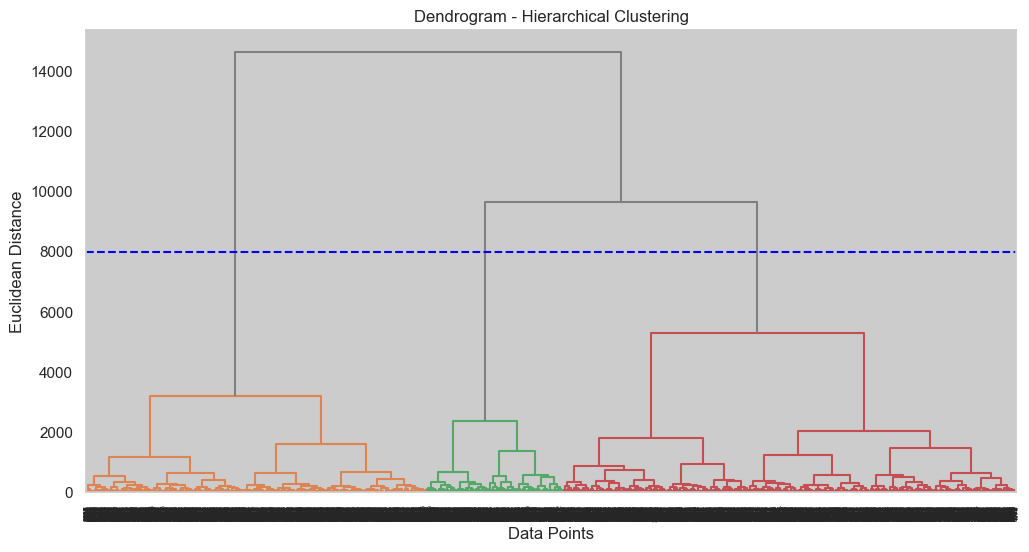

In [113]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster

# Gerar a matriz de ligação (linkage matrix)
Z = linkage(df2, method='ward')  # 'ward' é o mesmo padrão do AgglomerativeClustering

cut_height = 8000

# Plotar o dendrograma
plt.figure(figsize=(12, 6))
dendrogram(Z, color_threshold=cut_height, above_threshold_color='gray')  
plt.axhline(y=8000, color='blue', linestyle='--', label=f'Cut at {cut_height}')  # ← linha de corte
plt.title("Dendrogram - Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


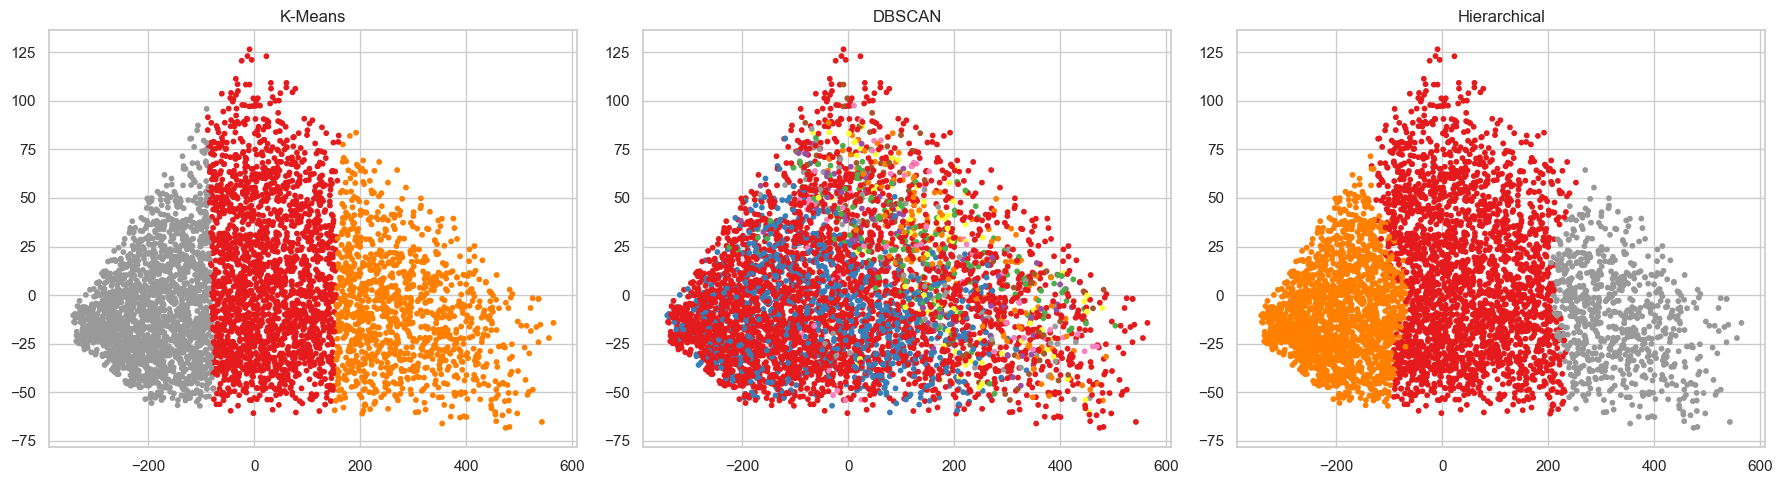

In [97]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduzir para 2D para visualização
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df2)

# Visualizar KMeans, DBSCAN e Hierarchical
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

clusterings = ['Cluster', 'Cluster_DBSCAN', 'Cluster_Hierarchical']
titles = ['K-Means', 'DBSCAN', 'Hierarchical']

for i, col in enumerate(clusterings):
    axes[i].scatter(df_pca[:, 0], df_pca[:, 1], c=df[col], cmap='Set1', s=10)
    axes[i].set_title(titles[i])

plt.tight_layout()
plt.show()


In [ ]:
# Compare with PCA - principal Componentes Analyses